# Рабочая тетрадь 8
## Лищенко Т.В. ИМБО-01-22

## Кластеризация

Кластеризация — разбиение множества объектов на подмножества,
называемые кластерами. Кластеризация, будучи математическим алгоритм
имеет широкое применение во многих сферах: начиная с таких естественно
научных областей как биология и физиология, и заканчивая маркетингом в
социальных сетях и поисковой оптимизацией. Цель – разделить данные
таким образом, чтобы точки, находящие в одном и том же кластере, были
очень схожи друг с другом, а точки, находящиеся в разных кластерах,
отличались друг от друга. Как и алгоритмы классификации, алгоритмы
кластеризации присваивают (или прогнозируют) каждой точке данных
номер кластера, которому она принадлежит.

Задача кластеризации относится к широкому классу задач обучения
без учителя. Кластеризацию применяют для анализа и поиска признаков по
которым можно объединить объекты, сжатия данных и поиска новизны (что
не входит ни в один кластер) В чем отличие классификации и
кластеризации: при классификации у вас есть набор предопределенных
классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому
классу принадлежит новый объект. При кластеризации вы используете
алгоритм, который пытается сгруппировать набор объектов и определить,
существует ли какая-либо взаимосвязь между объектами.

### ***Метод k-средних***

Кластеризация k-средних – один из самых простых и наиболее часто
используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает точки,
которые будут представлять центры кластеров (cluster centers). Затем для
каждой точки данных вычисляется его евклидово расстояние до каждого
центра кластера. Каждая точка назначается ближайшему центру кластера.
Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров.
Каждый центроид – это вектор, элементы которого представляют собой
средние значения характеристик, вычисленные по всем точкам кластера.
Центр кластера смещается в его центроид. Точки заново назначаются
ближайшему центру кластера. Этапы изменения центров кластеров и
переназначения точек итеративно повторяются до тех пор, пока границы
кластеров и расположение центроидов не перестанут изменяться, т.е. на
каждой итерации в каждый кластер будут попадать одни и те же точки
данных.

Алгоритм k-средних, наверное, самый популярный и простой
алгоритм кластеризации и очень легко представляется в виде простого
псевдокода:

1. Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

Стоит заметить, что можно рассчитывать расстояние между
центройдами по любой метрике (Евклидовой, Хемминговой и т.д.).

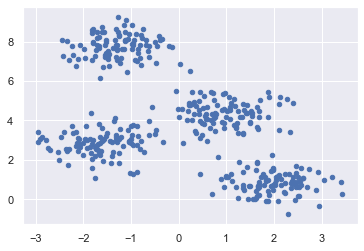

In [5]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
# Сгенерируем данные
from sklearn.datasets import make_blobs #ЭТО НАДО ОБНОВИТЬ
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0) 
plt.scatter(X[:, 0], X[:, 1], s = 20); 
plt.show()

In [14]:
# Затем создадим объект KMeans вместе с указанием количества кластеров # и обучим модель и сделайте прогноз следующим образом: 
kmeans = KMeans(n_clusters = 4, random_state=0) 
y_kmeans = kmeans.fit_predict(X) #ТУТ ТОЖЕ ОБНОВИТЬ

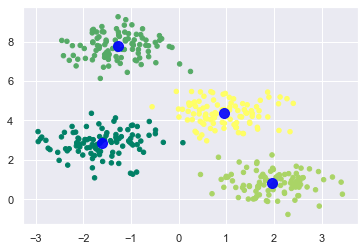

In [15]:
# Построии и визуализируем центры кластера, выбранные с помощью k-средних оценки Python from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0) 
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer') 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "blue", s = 100, alpha = 0.9); 
plt.show()

In [18]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
# загрузим набор цифр из sklearn 
from sklearn.datasets import load_digits 
digits = load_digits() 
digits.data.shape

(1797, 64)

In [19]:
# выполним кластеризацию
kmeans = KMeans(n_clusters = 10, random_state = 0) 
clusters = kmeans.fit_predict(digits.data) 
kmeans.cluster_centers_.shape

(10, 64)

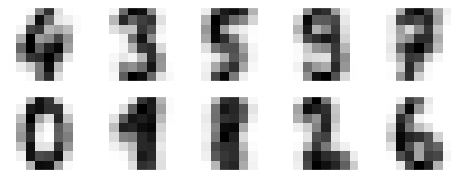

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Задание

In [26]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])

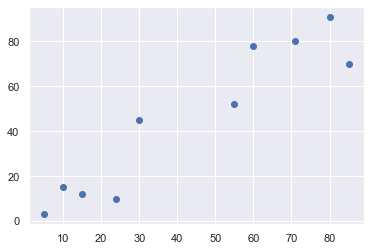

In [27]:
plt.scatter(X[:,0],X[:,1])

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0)
clucters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(2, 2)

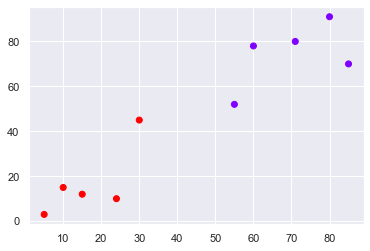

In [29]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

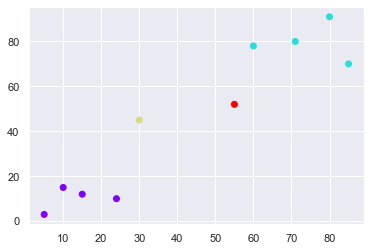

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0)
clucters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

### Задание

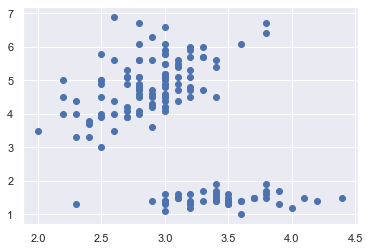

In [31]:
import pandas as pd

url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

X = pd.read_csv(url)

plt.scatter(X.iloc[:,1],X.iloc[:,2])

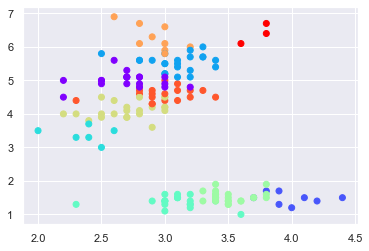

In [32]:
kmeans = KMeans(n_clusters=10, random_state=0)
clucters = kmeans.fit_predict(X.iloc[:,:4])
kmeans.cluster_centers_.shape
plt.scatter(X.iloc[:,1],X.iloc[:,2], c=kmeans.labels_ , cmap='rainbow')

## Иерархическая кластеризация

Алгомеративная кластеризация относится к семейству алгоритмов
кластеризации, в основе которых лежат одинаковые принципы: алгоритм
начинает свою работу с того, что каждую точку данных заносит в свой
собственный кластер и по мере выполнения объединяет два наиболее
схожих между собой кластера до тех пор, пока не будет удовлетворен
определенный критерий остановки. Зачастую данным критерием выступает
это количество кластеров, поэтому схожие между собой кластеры
объединяются до тех пор, пока не останется заданное число кластеров.

Результатом агломеративной кластеризации является иерархическая
кластеризация. Кластеризация выполняется итеративно, и каждая точка
совершает путь от отдельной точки-кластера до участника итогового
кластера. На каждом промежуточном шаге происходит кластеризация
данных (с разным количеством кластеров). Иногда полезно сразу взглянуть
на все возможные кластеризации. Следующий пример показывает
наложение всех возможных кластеризаций, показанных на рис. и дает
некоторое представление о том, как каждый кластер распадается на более
мелкие кластеры.


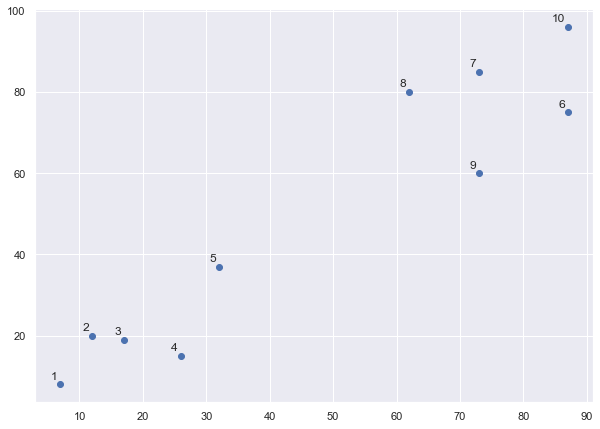

In [34]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
[[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96],]) 
labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0],X[:,1], label = 'True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]): 
    plt.annotate(label,xy = (x, y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom') 
plt.show()

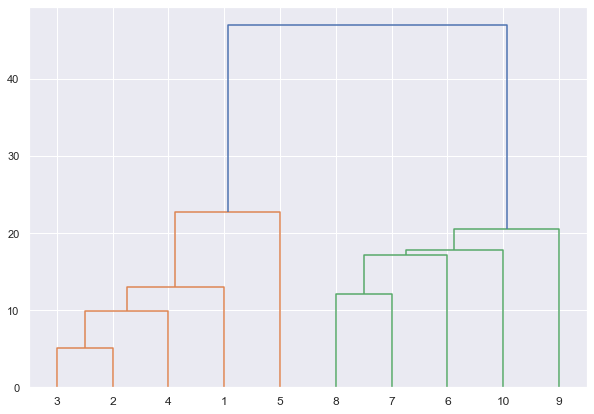

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList, distance_sort ='descending',show_leaf_counts = True) 
plt.show()

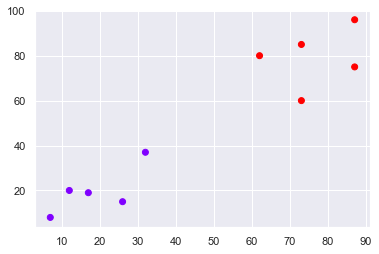

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward') 
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')

In [40]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

customer_data = pd.read_csv("./Mall_Customers.csv")
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
customer_data.shape

(200, 5)

In [42]:
data = customer_data.iloc[:, 3:5].values

<Figure size 5040x2160 with 0 Axes>

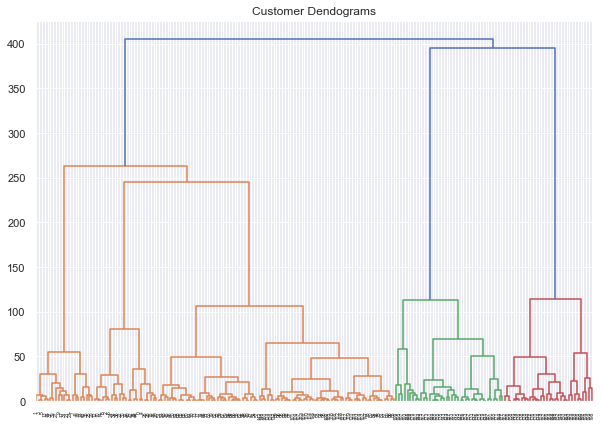

In [44]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

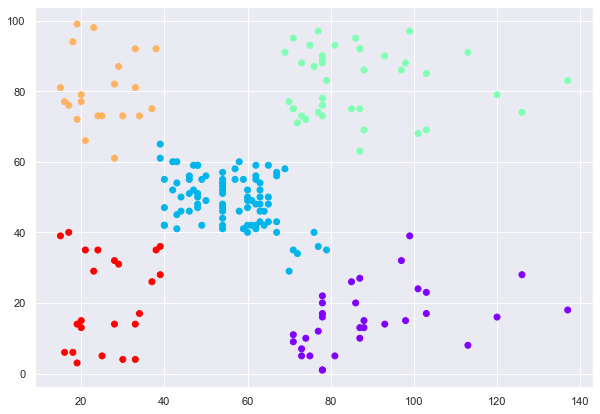

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### Задание

In [47]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим набор данных
url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Figure size 5040x2160 with 0 Axes>

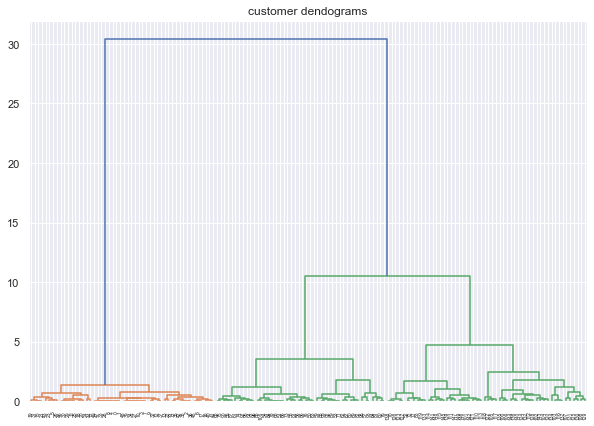

In [48]:
data = customer_data.iloc[:, 2:4].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28,12), dpi=180)
plt.figure(figsize=(10,7))
plt.title('customer dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 1, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 1, 2, 1, 4, 4, 4, 4, 1, 4, 2, 2, 2, 2, 1, 4, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

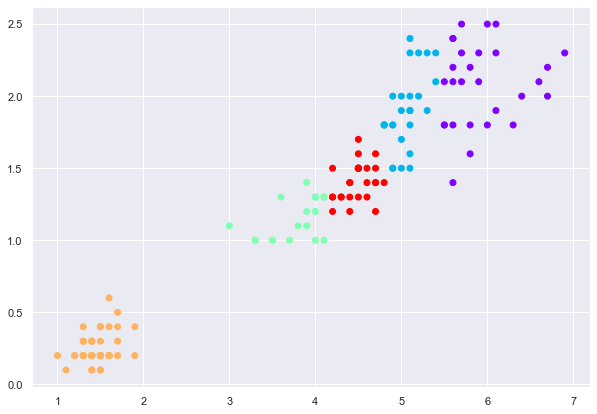

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')